### EDA

In [1]:
#Data Loading
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zahidmughal2343/amazon-sales-2025")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-sales-2025


In [193]:
import pandas as pd
# Load The Data
df = pd.read_csv('/kaggle/input/amazon-sales-2025/amazon_sales_data 2025.csv')
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [194]:
#Understand Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [195]:
#Since date is in object type lets convert it back to data time format
df['Date']=pd.to_datetime(df['Date'])
print(df.head())
df.info()

  Order ID       Date        Product     Category  Price  Quantity  \
0  ORD0001 2025-03-14  Running Shoes     Footwear     60         3   
1  ORD0002 2025-03-20     Headphones  Electronics    100         4   
2  ORD0003 2025-02-15  Running Shoes     Footwear     60         2   
3  ORD0004 2025-02-19  Running Shoes     Footwear     60         3   
4  ORD0005 2025-10-03     Smartwatch  Electronics    150         3   

   Total Sales  Customer Name Customer Location Payment Method     Status  
0          180     Emma Clark          New York     Debit Card  Cancelled  
1          400  Emily Johnson     San Francisco     Debit Card    Pending  
2          120       John Doe            Denver     Amazon Pay  Cancelled  
3          180  Olivia Wilson            Dallas    Credit Card    Pending  
4          450     Emma Clark          New York     Debit Card    Pending  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column       

<ipython-input-195-10c5581f71ec>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [196]:
df.describe()

,Date,Price,Quantity,Total Sales
count,250,250.000000,250.000000,250.000000
mean,2025-04-18 05:51:21.600000,343.580000,2.856000,975.380000
min,2025-01-03 00:00:00,15.000000,1.000000,15.000000
25%,2025-02-24 00:00:00,40.000000,2.000000,100.000000
50%,2025-03-19 00:00:00,150.000000,3.000000,400.000000
75%,2025-05-02 18:00:00,600.000000,4.000000,1500.000000
max,2025-12-03 00:00:00,1200.000000,5.000000,6000.000000
std,NaN,380.635808,1.429489,1252.112254


In [197]:
#check for missing /NULL values
df.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


There are no null values in out data set

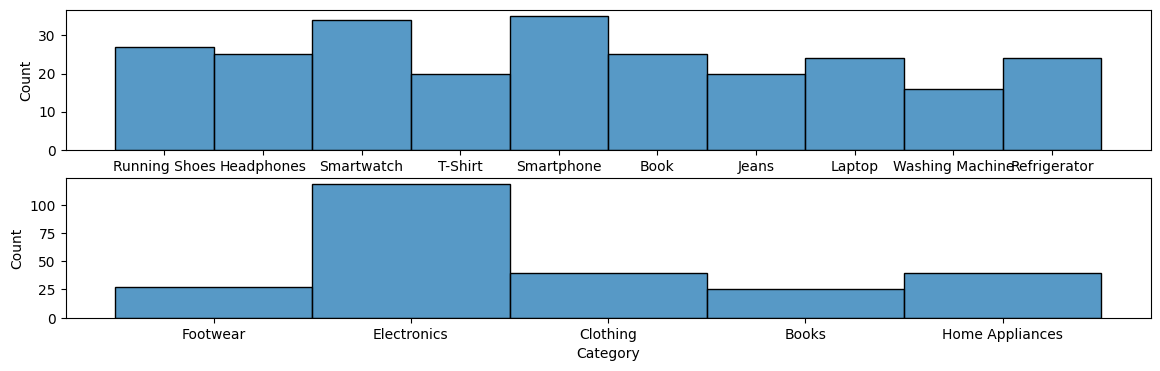

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.subplot(2,1,1)
sns.histplot(df['Product'])
plt.subplot(2,1,2)
sns.histplot(df['Category'])
plt.show()

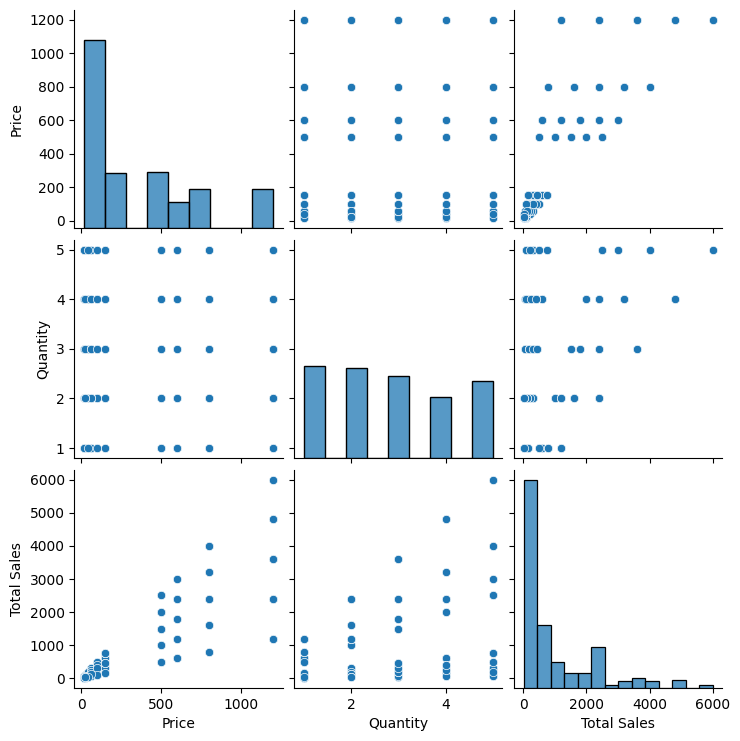

In [199]:
sns.pairplot(df)
plt.show()

In [202]:
df_new=df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           250 non-null    object        
 1   Date               250 non-null    datetime64[ns]
 2   Product            250 non-null    object        
 3   Category           250 non-null    object        
 4   Price              250 non-null    int64         
 5   Quantity           250 non-null    int64         
 6   Total Sales        250 non-null    int64         
 7   Customer Name      250 non-null    object        
 8   Customer Location  250 non-null    object        
 9   Payment Method     250 non-null    object        
 10  Status             250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 21.6+ KB


In [203]:
#drop order ID as it does not help in predicions
df_new.drop(columns='Order ID',inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               250 non-null    datetime64[ns]
 1   Product            250 non-null    object        
 2   Category           250 non-null    object        
 3   Price              250 non-null    int64         
 4   Quantity           250 non-null    int64         
 5   Total Sales        250 non-null    int64         
 6   Customer Name      250 non-null    object        
 7   Customer Location  250 non-null    object        
 8   Payment Method     250 non-null    object        
 9   Status             250 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 19.7+ KB


In [227]:
#One hot encoding
#get all columns which are objects
cols=df_new.select_dtypes(include='object').columns.to_list()
for each in cols:
  print(each)
  print(df_new[each].unique())

Product
['Running Shoes' 'Headphones' 'Smartwatch' 'T-Shirt' 'Smartphone' 'Book'
 'Jeans' 'Laptop' 'Washing Machine' 'Refrigerator']
Category
['Footwear' 'Electronics' 'Clothing' 'Books' 'Home Appliances']
Customer Name
['Emma Clark' 'Emily Johnson' 'John Doe' 'Olivia Wilson' 'Sophia Miller'
 'David Lee' 'Michael Brown' 'Daniel Harris' 'Chris White' 'Jane Smith']
Customer Location
['New York' 'San Francisco' 'Denver' 'Dallas' 'Houston' 'Miami' 'Boston'
 'Seattle' 'Los Angeles' 'Chicago']
Payment Method
['Debit Card' 'Amazon Pay' 'Credit Card' 'PayPal' 'Gift Card']
Status
['Cancelled' 'Pending' 'Completed']


In [229]:
# from sklearn.preprocessing import LabelEncoder
df_new=pd.get_dummies(df_new,columns=cols,drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             250 non-null    datetime64[ns]
 1   Price                            250 non-null    int64         
 2   Quantity                         250 non-null    int64         
 3   Total Sales                      250 non-null    int64         
 4   Product_Headphones               250 non-null    bool          
 5   Product_Jeans                    250 non-null    bool          
 6   Product_Laptop                   250 non-null    bool          
 7   Product_Refrigerator             250 non-null    bool          
 8   Product_Running Shoes            250 non-null    bool          
 9   Product_Smartphone               250 non-null    bool          
 10  Product_Smartwatch               250 non-null    bool         

In [233]:
df_new['day']=df_new['Date'].dt.day
df_new['month']=df_new['Date'].dt.month
df_new['year']=df_new['Date'].dt.year

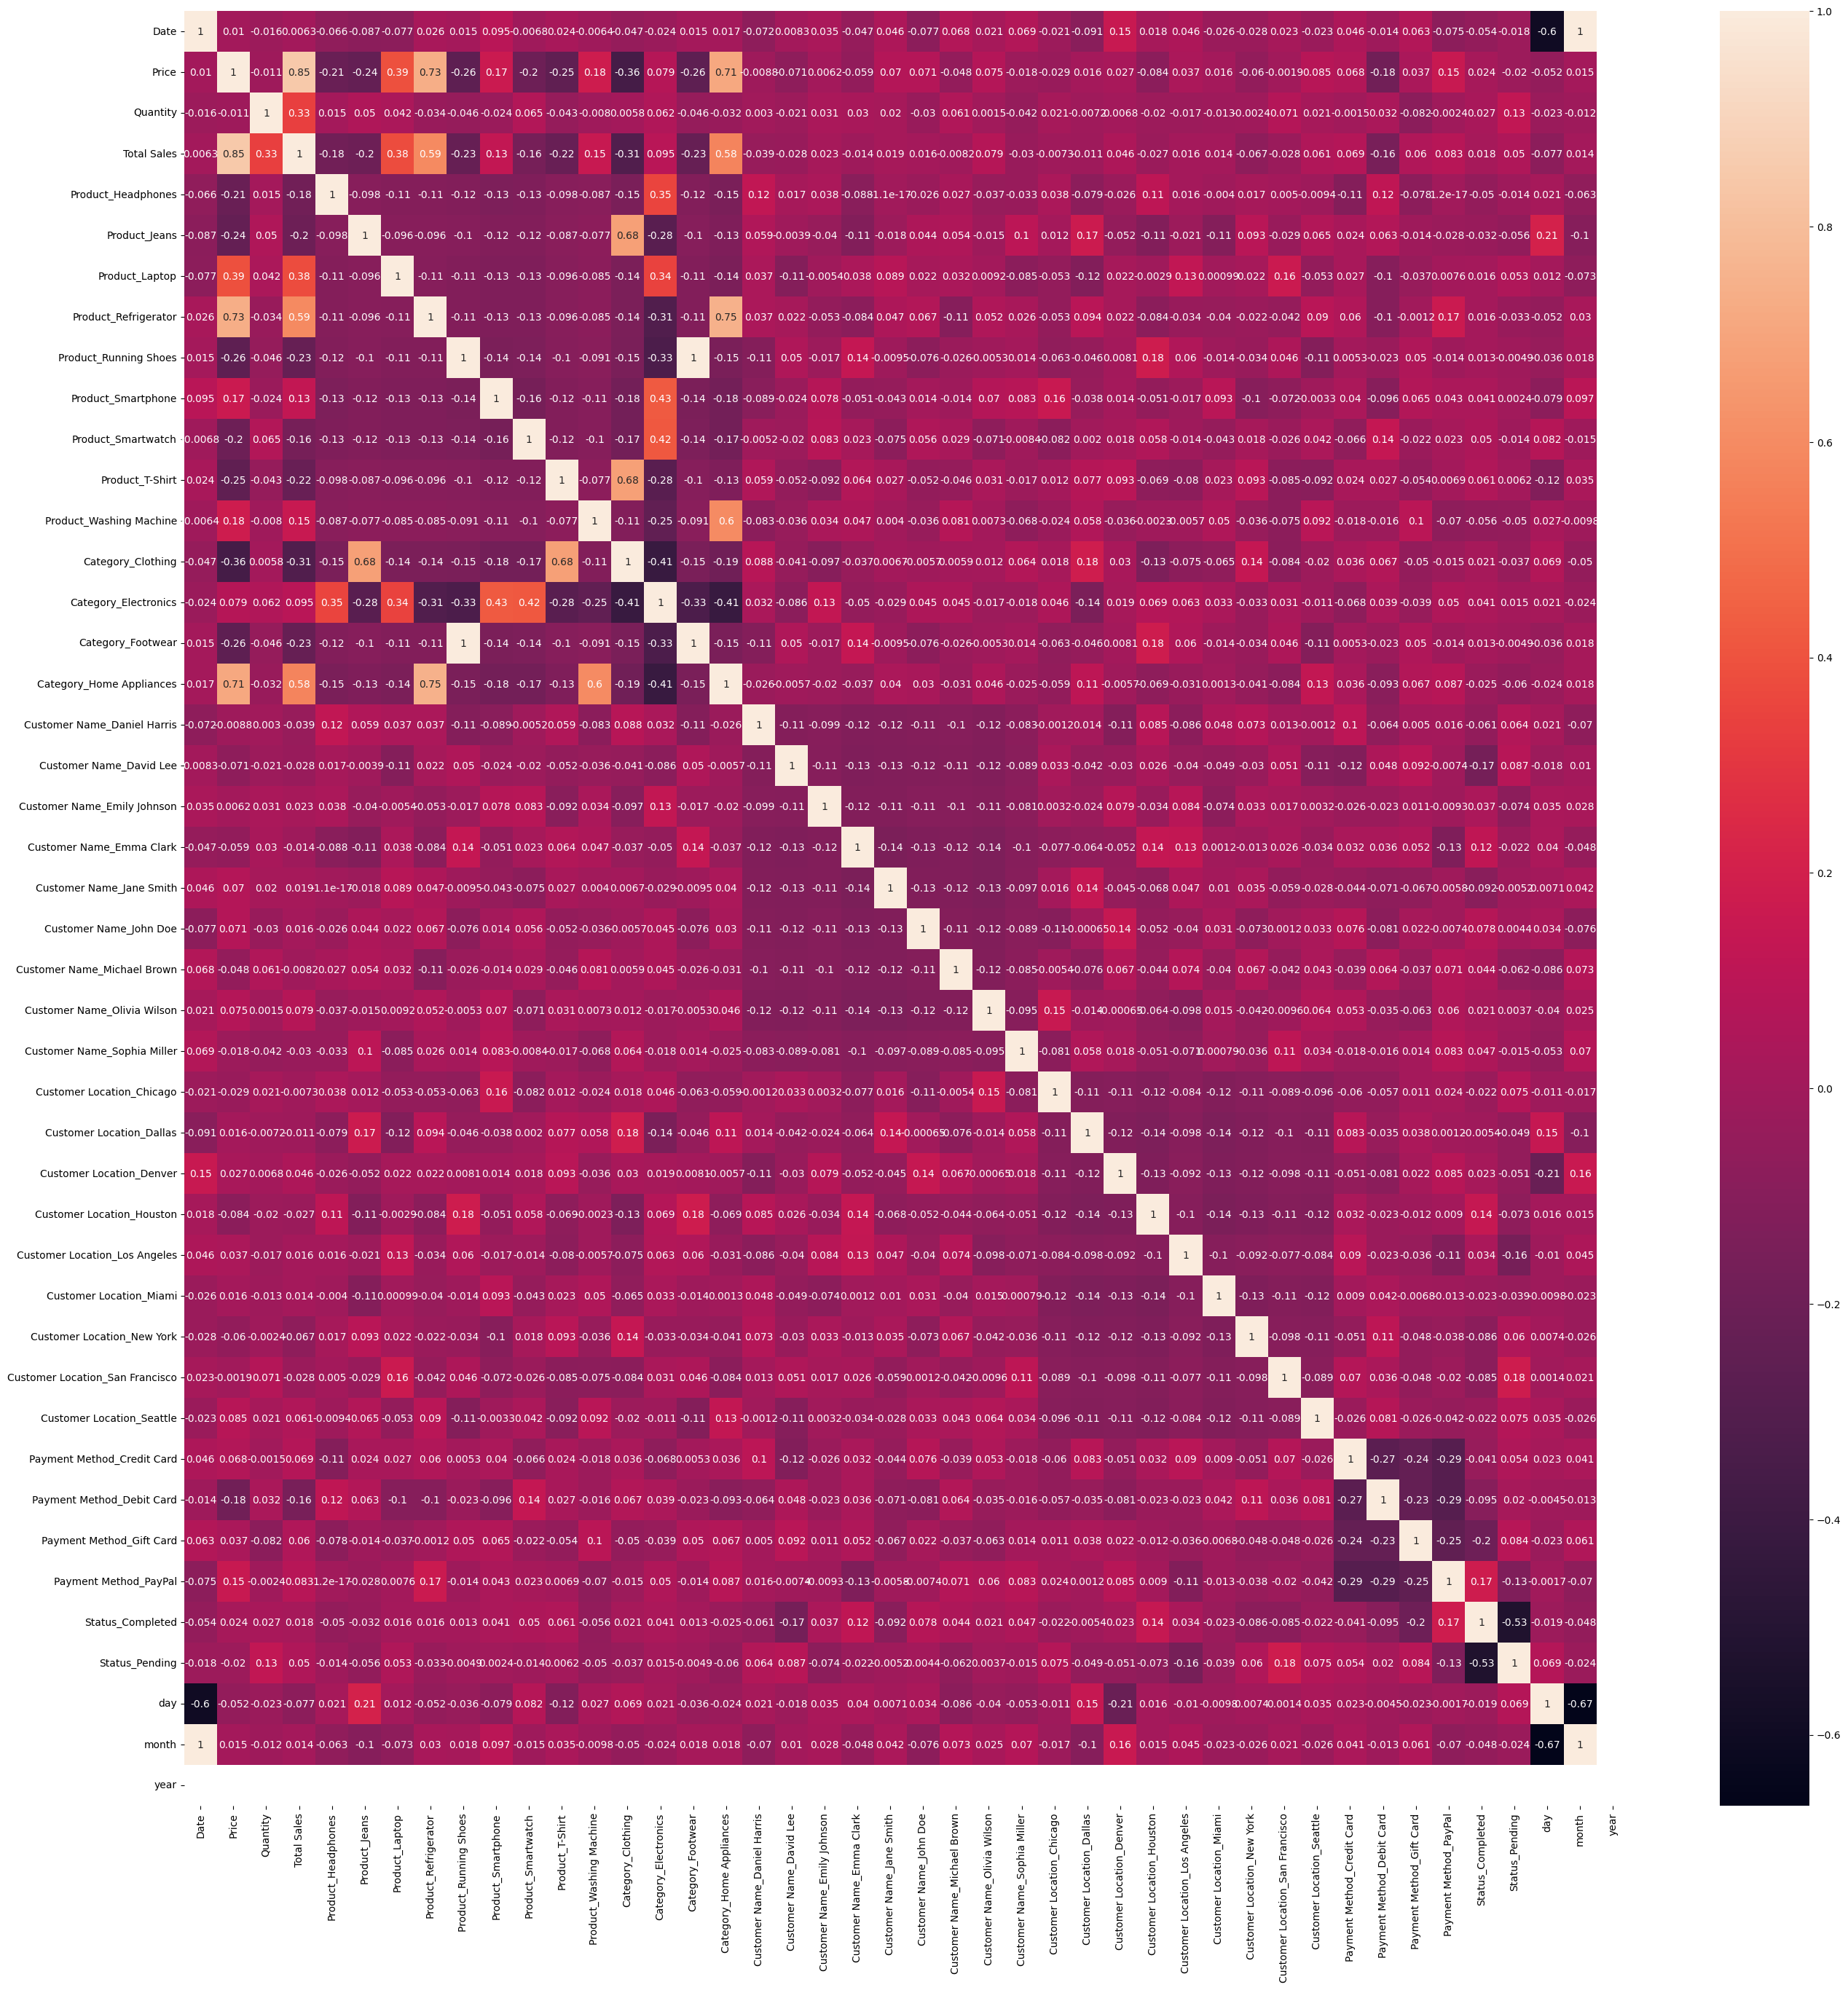

In [239]:
plt.figure(figsize=(32,32))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

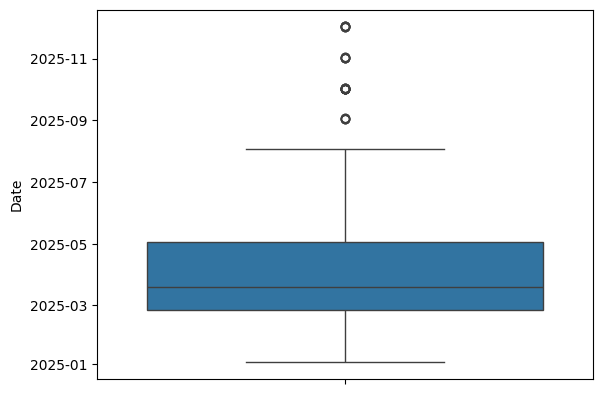

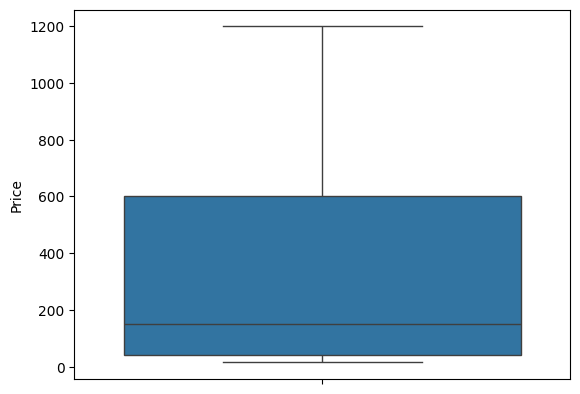

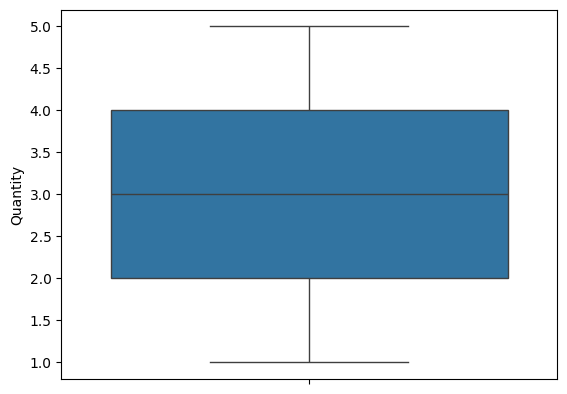

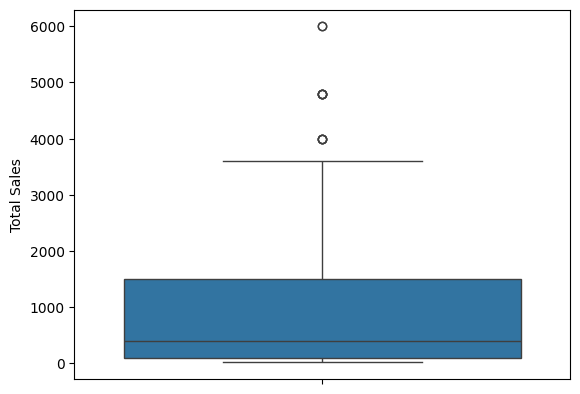

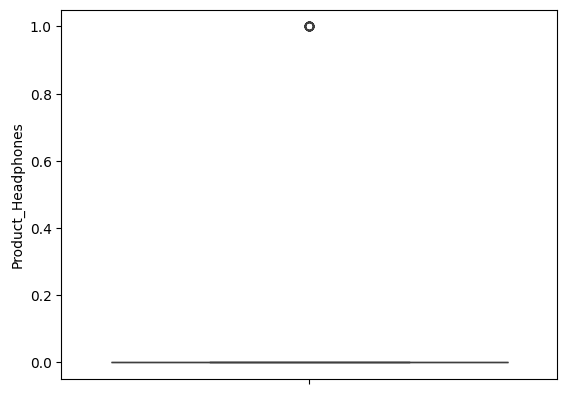

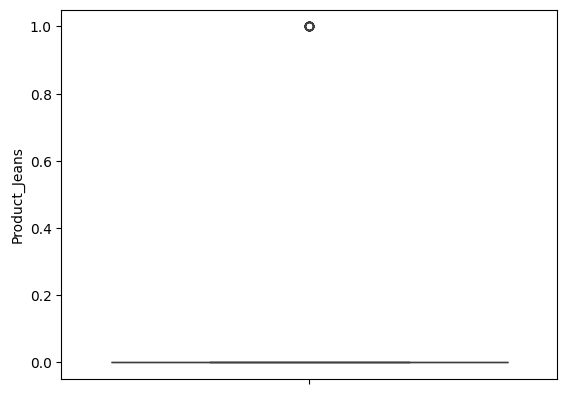

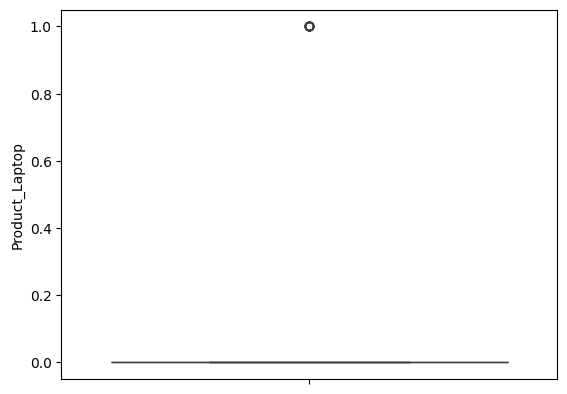

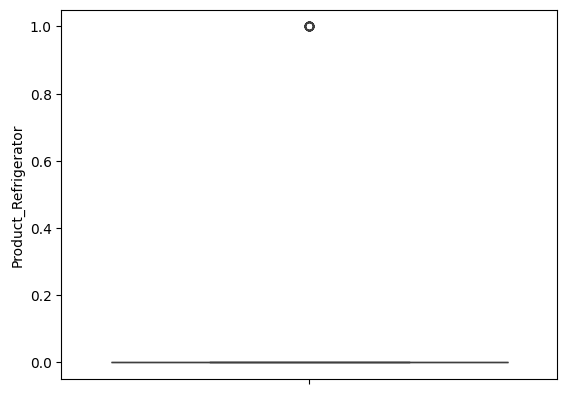

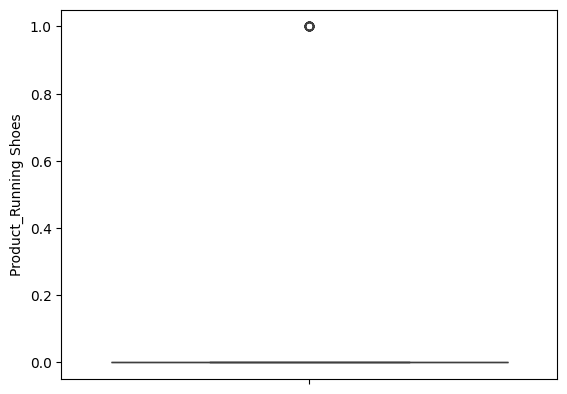

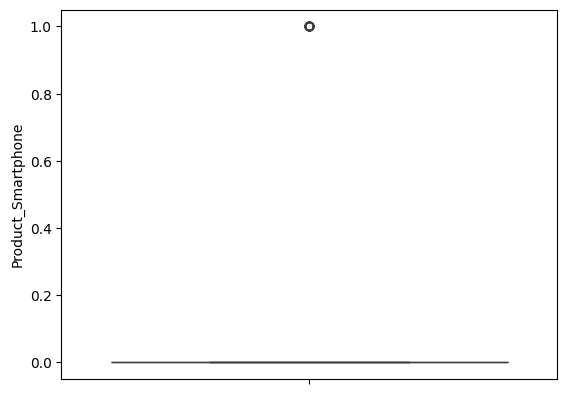

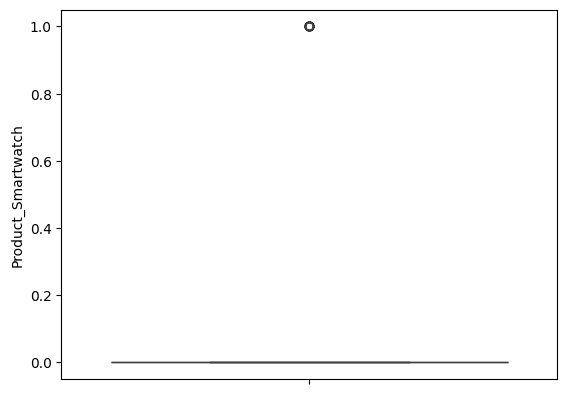

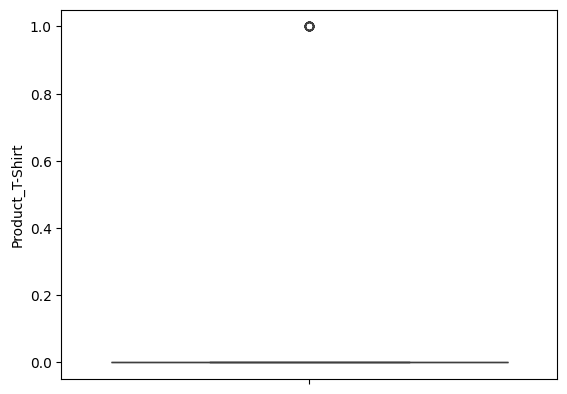

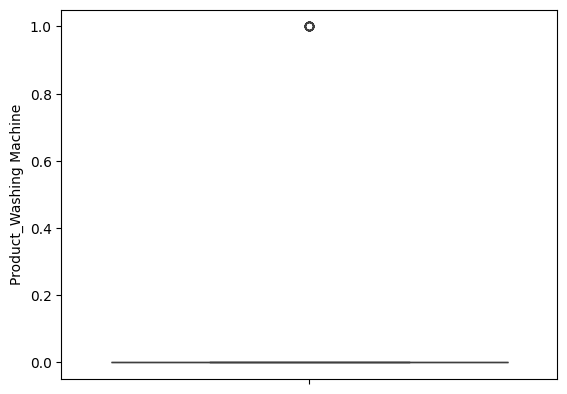

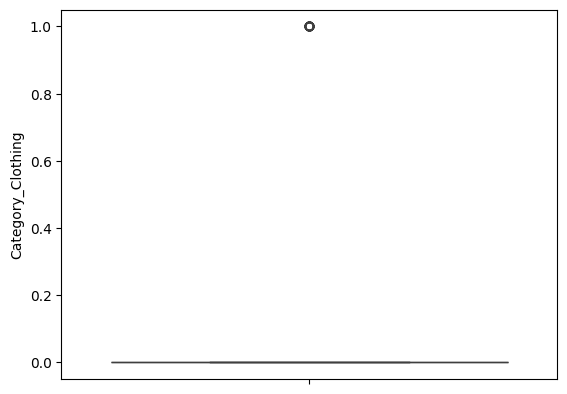

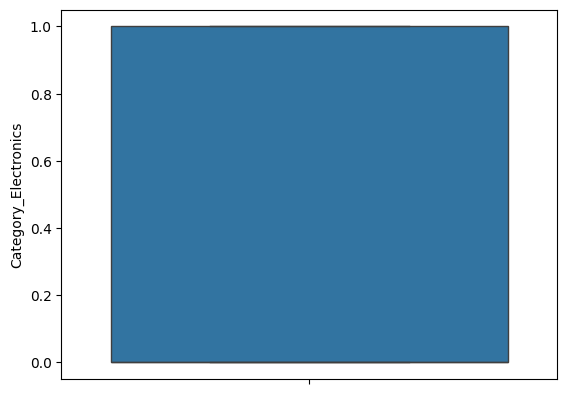

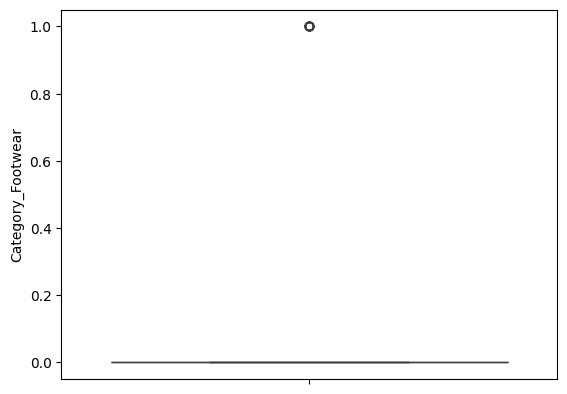

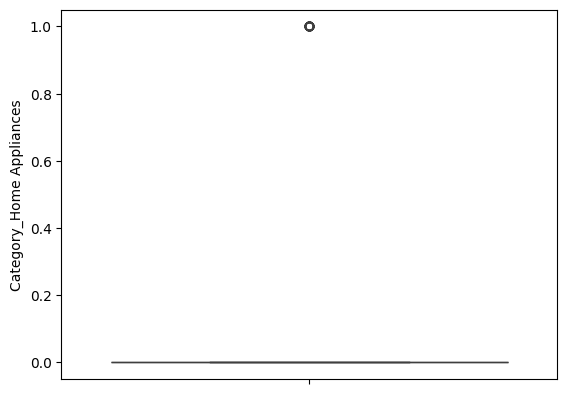

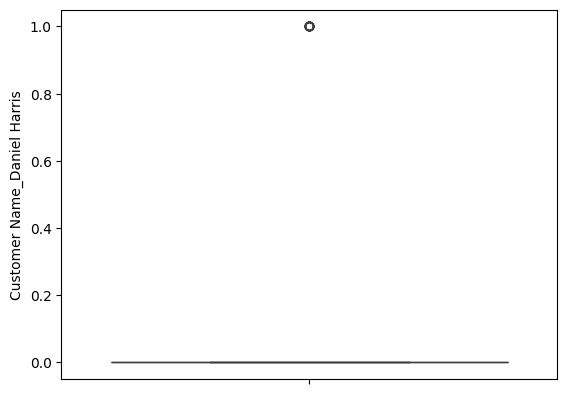

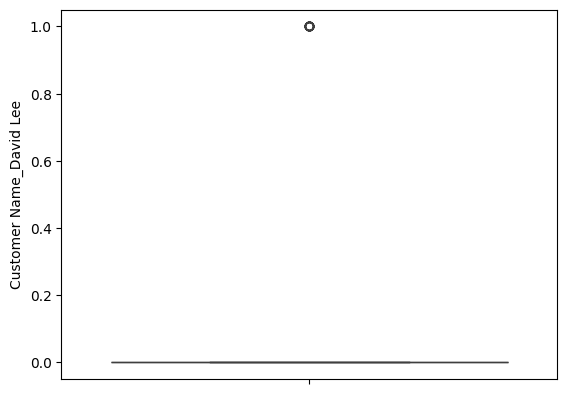

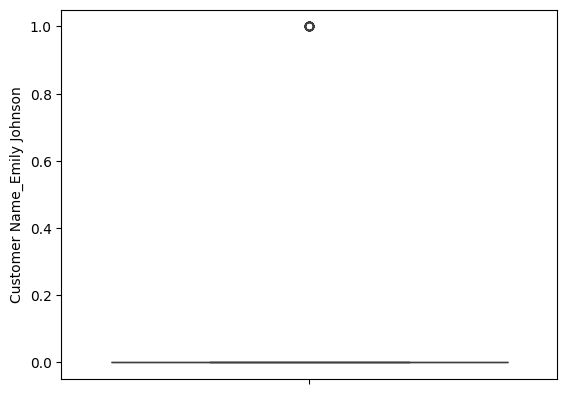

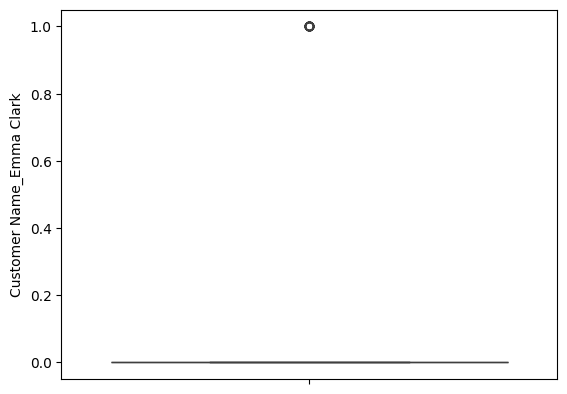

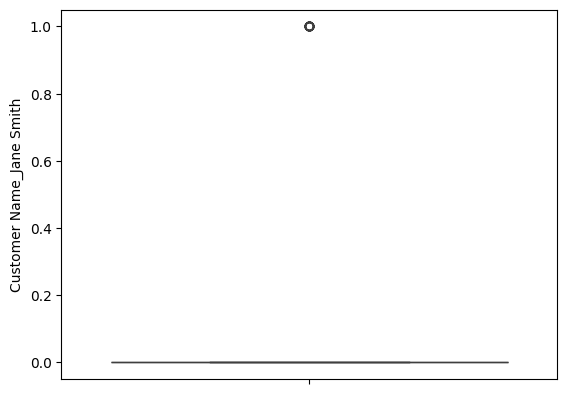

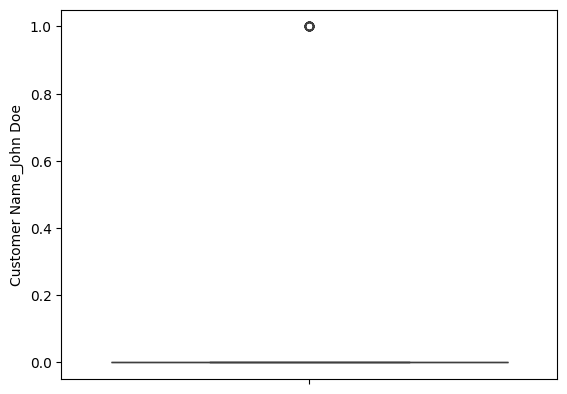

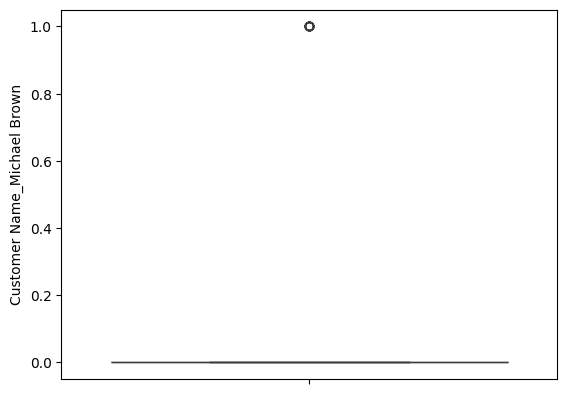

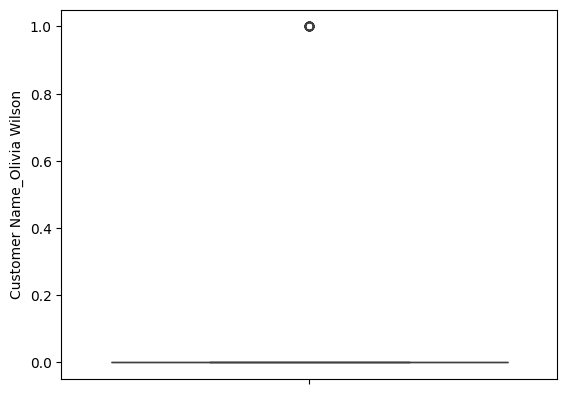

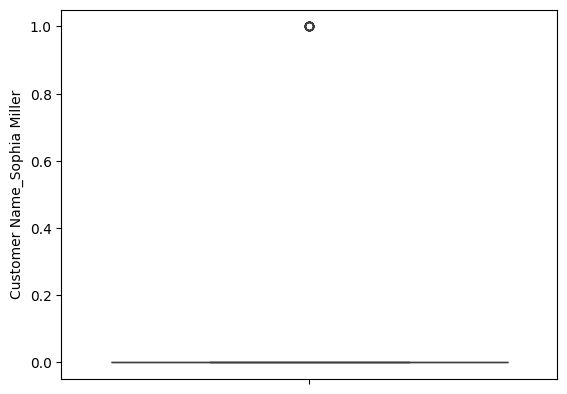

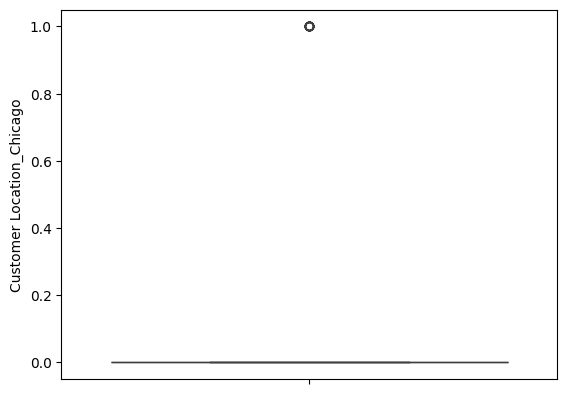

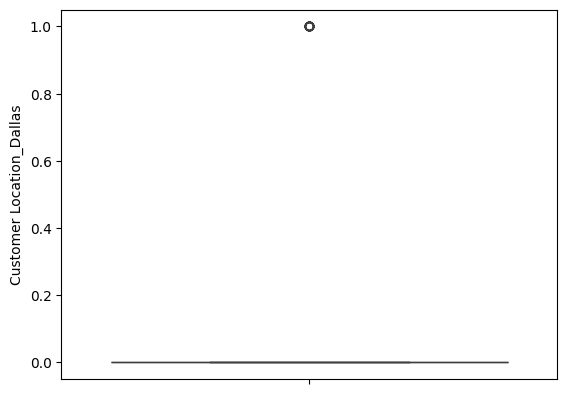

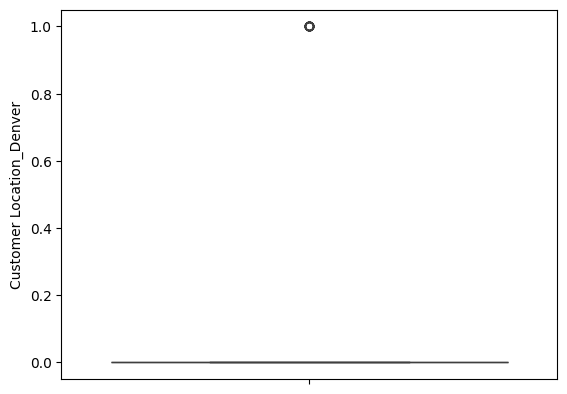

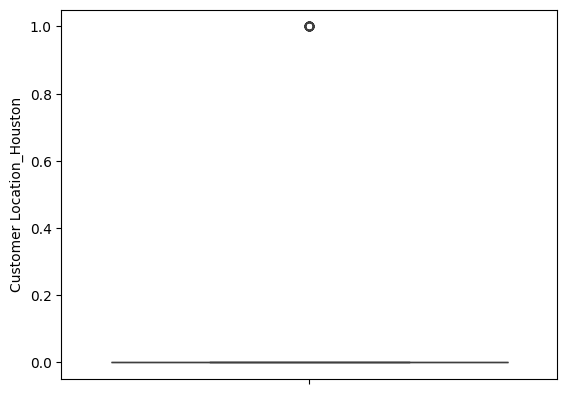

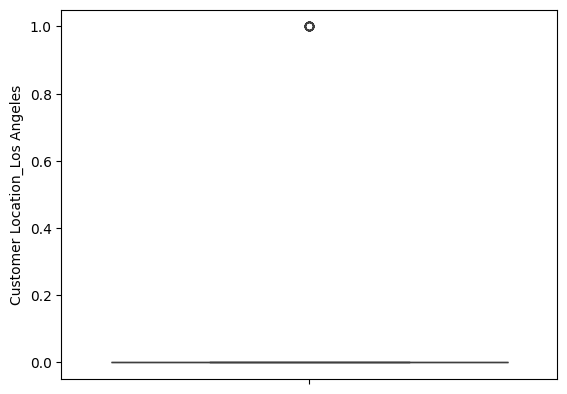

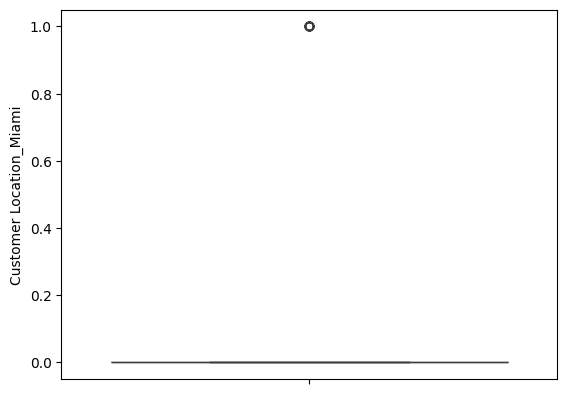

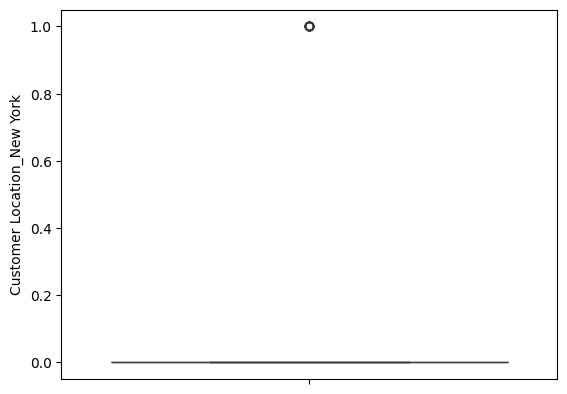

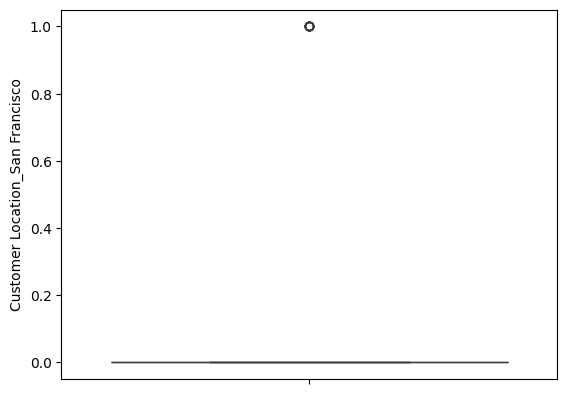

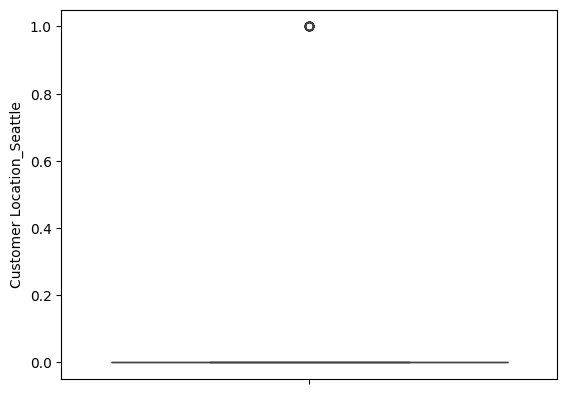

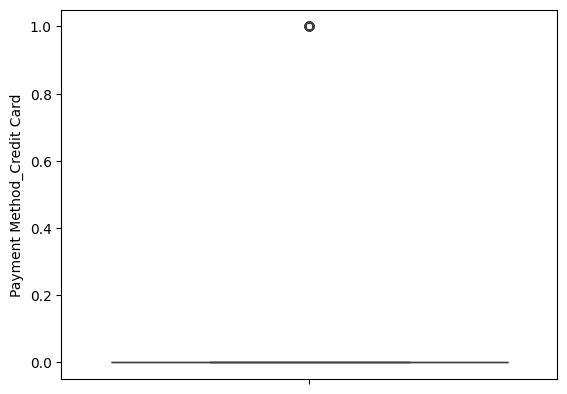

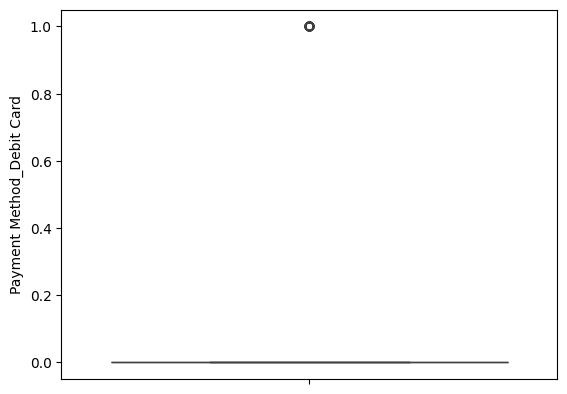

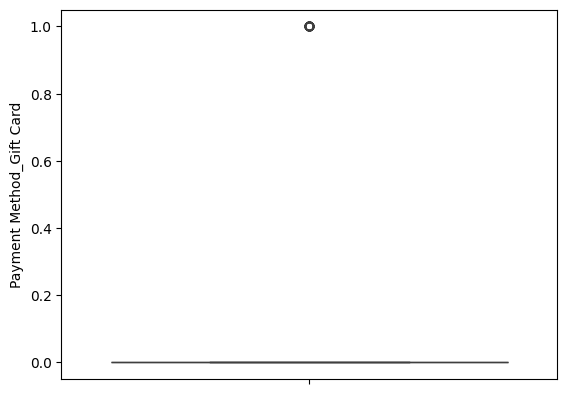

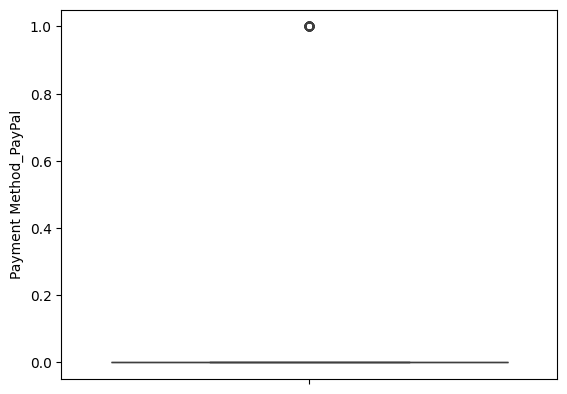

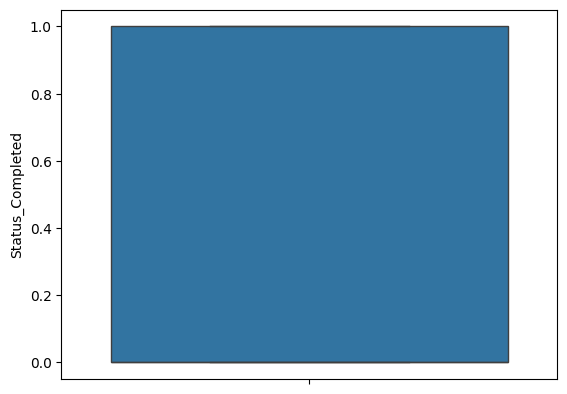

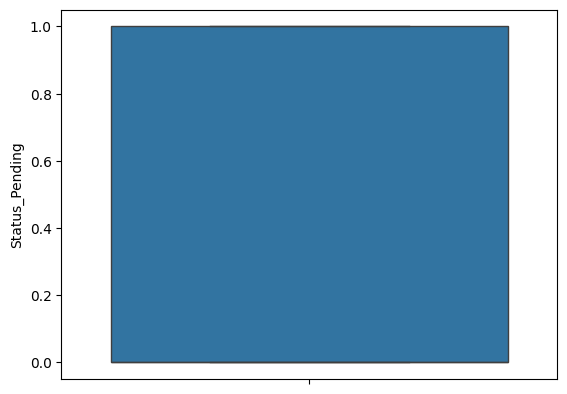

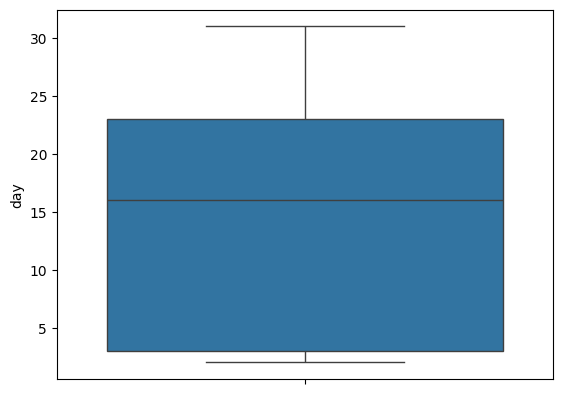

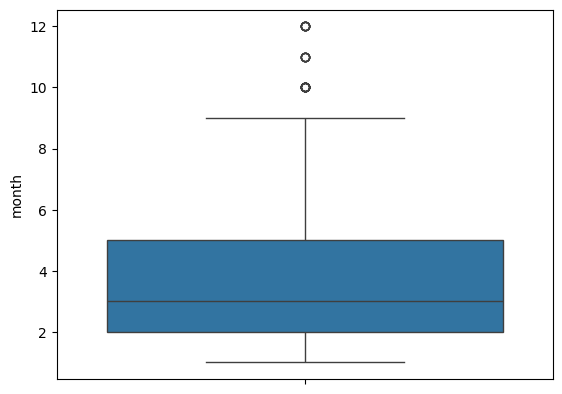

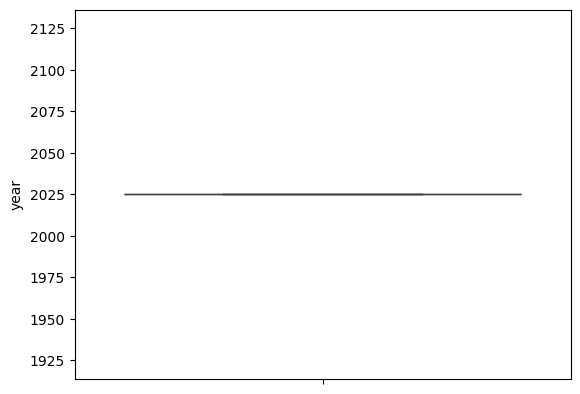

In [243]:
for each in df_new.columns.to_list():
  sns.boxplot(df_new[each])
  plt.show()

Since there are not much influential points , we can ignore

In [267]:
##Model creation

#Data splitting
from sklearn.model_selection import train_test_split
X=df_new.drop(columns=['Total Sales','Date'])
y=df_new['Total Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(len(X_train),len(X_test))

200 50


In [268]:
#Lets create a pipeline for data preprocessing and model
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor

pipe=Pipeline([
    ('scale',StandardScaler()),
    ('model',LinearRegression())
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [269]:
y_pred=pipe.predict(X_test)
# from sklearn.metrics import classification_report,mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


MAE: 407.9062552571304
MSE: 287940.2885778347
RMSE: 287940.2885778347
R^2 Score: 0.6815727228683928


In [277]:
#Experimenting with different models and scalings using Grid Search CV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params={
    'scale':[StandardScaler(),MinMaxScaler(),RobustScaler()],
    'model':[LinearRegression(),LogisticRegression(),RandomForestRegressor()]
}
grid=GridSearchCV(pipe,params)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)


{'model': RandomForestRegressor(), 'scale': MinMaxScaler()}
0.9795281492151668


In [280]:
#Experimenting with different models and scalings using Grid Search CV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params={
    'scale':[StandardScaler(),MinMaxScaler(),RobustScaler()],
    'model':[LinearRegression(),LogisticRegression(),RandomForestRegressor()]
}
grid=RandomizedSearchCV(pipe,params)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'scale': MinMaxScaler(), 'model': RandomForestRegressor()}
0.9797523225456611


Both the search types votes RandomForestRegressor as best model when data is transformed using MinMaxScale